In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
#Due to big numbers, set some option to display them well formatted
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
df = pd.read_csv('la_crime_2010_to_2023.csv')
df_categories = pd.read_csv('mo_codes.csv')
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'AREA'],
      dtype='object')


In [3]:
"{:,}".format(len(df))

'2,993,433'

In [4]:
print(df_categories.columns)

Index(['code', 'description'], dtype='object')


In [5]:
df.isna().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA               857658
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            352115
Vict Age                0
Vict Sex           314958
Vict Descent       315011
Premis Cd              57
Premis Desc           717
Weapon Used Cd    1978414
Weapon Desc       1978415
Status                  3
Status Desc             0
Crm Cd 1               21
Crm Cd 2          2787544
Crm Cd 3          2987613
Crm Cd 4          2993263
LOCATION                0
Cross Street      2499025
LAT                     0
LON                     0
AREA              2135775
dtype: int64

Instead of 'Vict Descent' add the appropriate descriptions to a new column 

In [40]:
# Mapping dictionary for 'Vict Descent' codes to meanings
descent_mapping = {
    'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian',
    'F': 'Filipino', 'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean',
    'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan',
    'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indian'
}

# Create a new column 'Descent Meaning' by mapping 'Vict Descent' codes
df['Descent Meaning'] = df['Vict Descent'].map(descent_mapping)

Same can be done for sex

In [42]:
# Mapping dictionary for 'Vict Sex' codes to meanings
sex_mapping = {
    'M': 'Male', 'F': 'Female', 'X': 'Other/Unknown', 'H': 'Transgender',
    'N': 'Not Specified', '-': 'Not Specified'  # You might want to adjust this based on actual meanings
}

# Create a new column 'Sex Meaning' by mapping 'Vict Sex' codes
df['Sex Meaning'] = df['Vict Sex'].map(sex_mapping)

General Descriptive Statistics for Numerical Columns:
               DR_NO     TIME OCC        AREA   Rpt Dist No     Part 1-2  \
count   2,993,433.00 2,993,433.00 2,135,775.00 2,993,433.00 2,993,433.00   
mean  169,158,298.24     1,352.59        11.12     1,146.87         1.44   
std    40,325,121.14       649.11         6.01       603.74         0.50   
min           817.00         1.00         1.00       100.00         1.00   
25%   131,712,554.00       916.00         6.00       638.00         1.00   
50%   171,120,978.00     1,430.00        12.00     1,177.00         1.00   
75%   202,005,737.00     1,900.00        16.00     1,659.00         2.00   
max   910,220,366.00     2,359.00        21.00     2,199.00         2.00   

            Crm Cd     Vict Age    Premis Cd  Weapon Used Cd     Crm Cd 1  \
count 2,993,433.00 2,993,433.00 2,993,376.00    1,015,019.00 2,993,412.00   
mean        505.34        31.15       309.76          368.75       505.14   
std         209.86        21.0

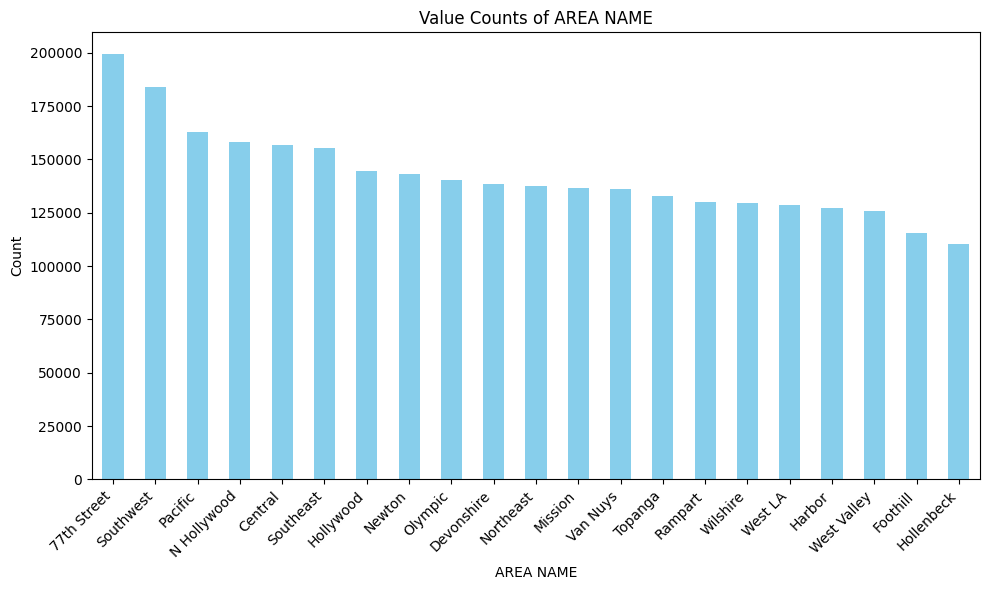

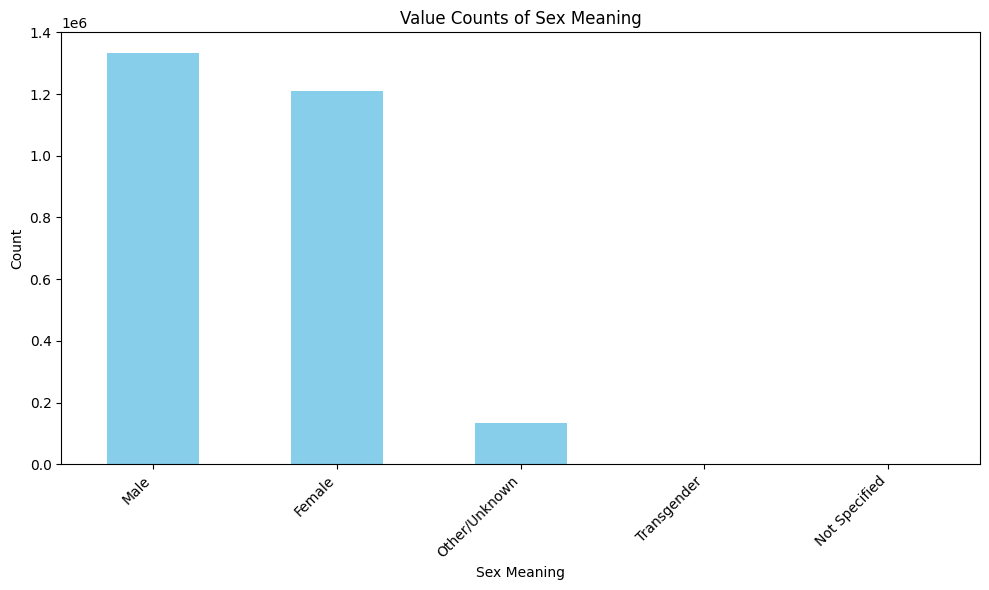

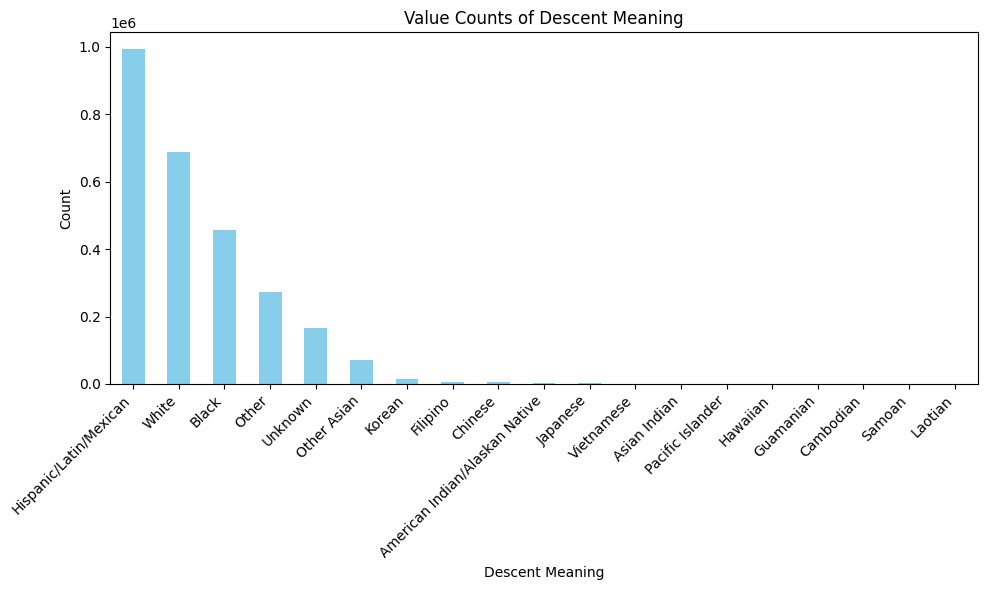

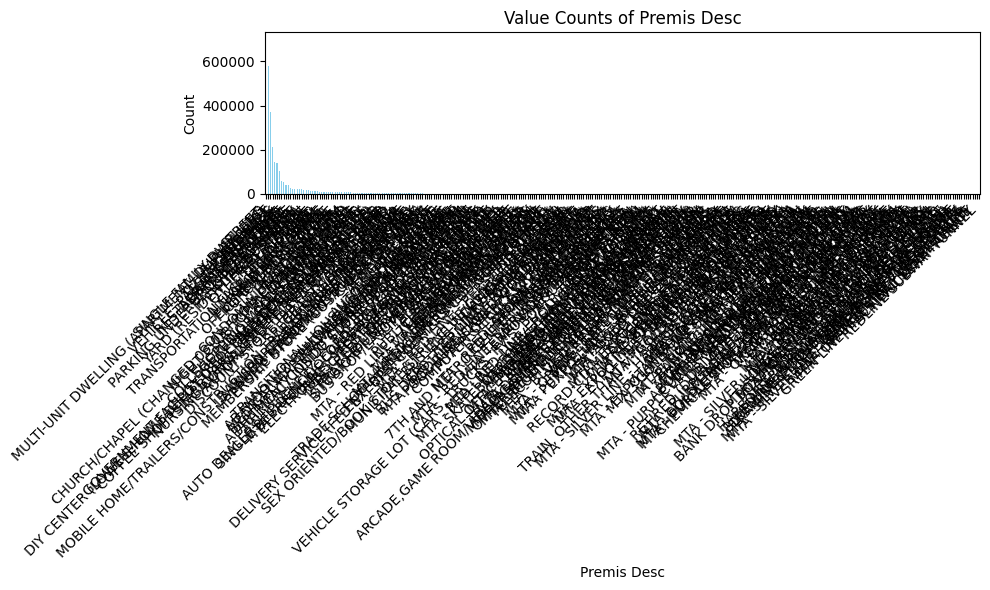

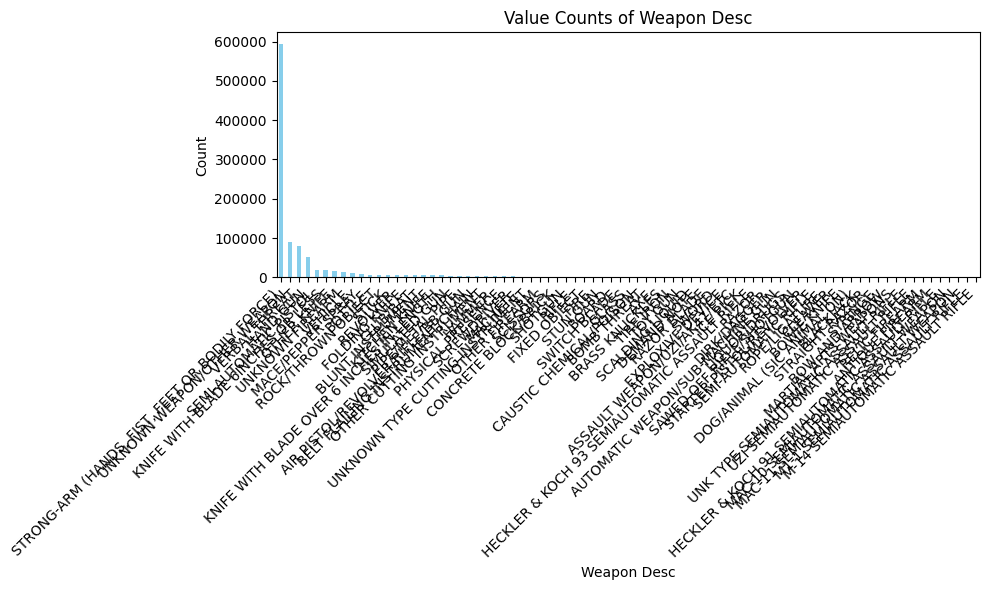

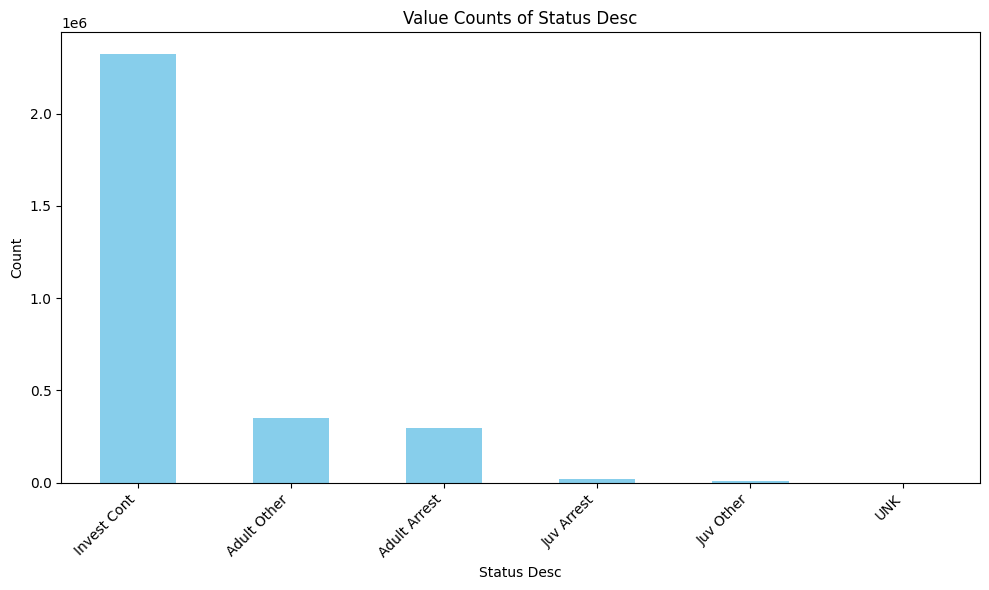

In [45]:
# Display general descriptive statistics for numerical columns
numerical_stats = df.describe()

# Value counts for categorical columns
categorical_stats = {}
categorical_columns = ['AREA NAME', 'Sex Meaning', 'Descent Meaning' , 'Premis Desc', 'Weapon Desc', 'Status Desc']

for col in categorical_columns:
    categorical_stats[col] = df[col].value_counts().sort_values(ascending=False)

# Print general descriptive statistics
print("General Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

print("\nValue Counts for Categorical Columns:")
for col, values in categorical_stats.items():
    print(f"\nColumn: {col}")
    print(values)

for col in categorical_columns:
    # Calculate value counts and sort in descending order
    value_counts = df[col].value_counts().sort_values(ascending=False)

    # Create a bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
    plt.tight_layout()
    plt.show()

In [47]:
byDesc = df.groupby('Crm Cd Desc')['DR_NO'].count().sort_values(ascending=False)

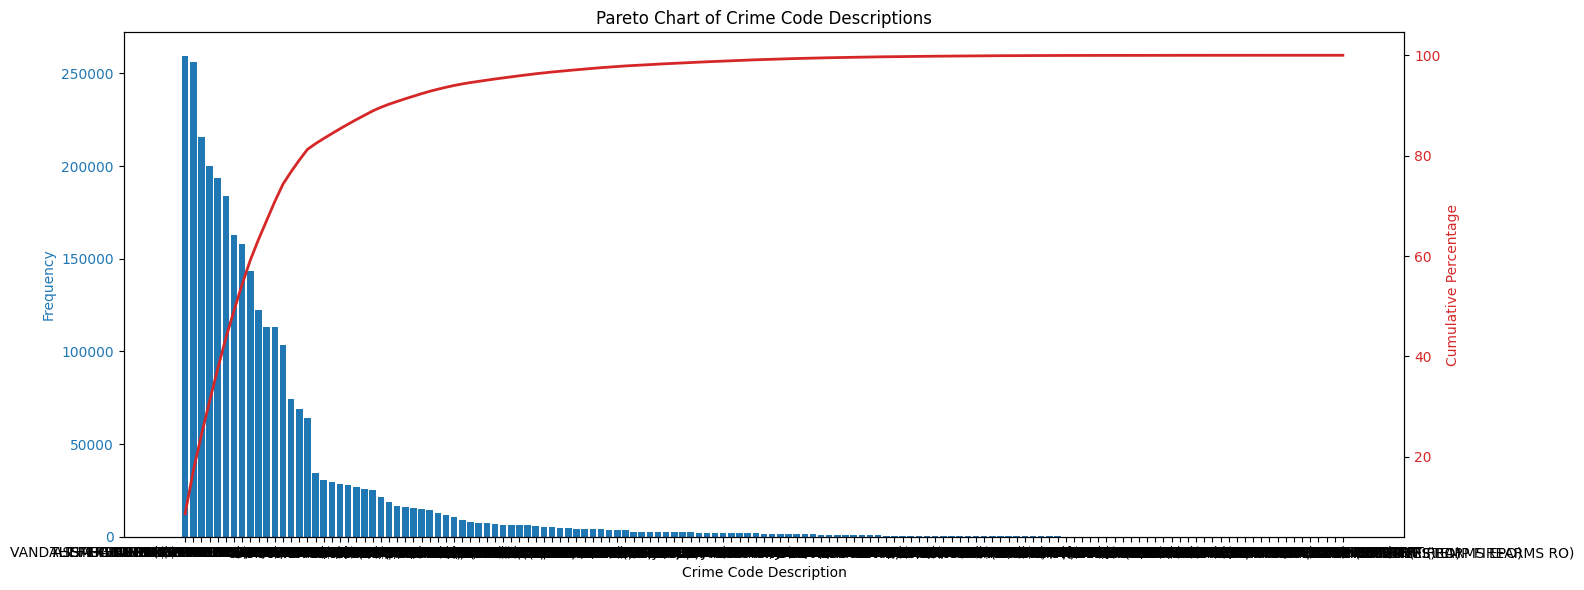

In [48]:
import matplotlib.pyplot as plt
# Calculate cumulative percentage
cumulative_percentage = byDesc.cumsum() / byDesc.sum() * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.bar(byDesc.index, byDesc.values, color='tab:blue')
ax1.set_xlabel('Crime Code Description')
ax1.set_ylabel('Frequency', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(byDesc.index, cumulative_percentage, color='tab:red', linestyle='-', linewidth=2.0)
ax2.set_ylabel('Cumulative Percentage', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Pareto Chart of Crime Code Descriptions')
plt.xticks(byDesc.index, rotation='vertical')
plt.tight_layout()
plt.show()

In [50]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Create a new DataFrame without NaN values in 'Mocodes'
df_no_nan = df.dropna(subset=['Mocodes']).copy()

# Split codes into lists for each transaction
transactions = df_no_nan['Mocodes'].str.split().values.tolist()

# Convert transaction lists into a transaction encoding format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display association rules sorted by lift
association_rules_df.sort_values(by='lift', ascending=False, inplace=True)
print(association_rules_df)

      antecedents   consequents  antecedent support  consequent support  \
119        (1814)  (0913, 2000)                0.04                0.03   
114  (0913, 2000)        (1814)                0.03                0.04   
91   (1307, 0344)        (1609)                0.03                0.05   
94         (1609)  (1307, 0344)                0.05                0.03   
103  (0416, 1813)        (2000)                0.01                0.09   
..            ...           ...                 ...                 ...   
25         (1202)        (0344)                0.04                0.36   
23         (0344)        (0377)                0.36                0.03   
22         (0377)        (0344)                0.03                0.36   
85         (1822)        (1402)                0.19                0.07   
84         (1402)        (1822)                0.07                0.19   

     support  confidence  lift  leverage  conviction  zhangs_metric  
119     0.02        0.37 12.2

In [53]:
# Function to map codes to descriptions
def map_to_descriptions(itemset):
    descriptions = [df_categories[df_categories['code'] == int(code.lstrip('0'))]['description'].values[0] for code in itemset]
    return ", ".join(descriptions)

# Mapping antecedents and consequents to descriptions
association_rules_df['Antecedent Desc'] = association_rules_df['antecedents'].apply(map_to_descriptions)
association_rules_df['Consequent Desc'] = association_rules_df['consequents'].apply(map_to_descriptions)

# Display relevant association rules with descriptions
print(association_rules_df[['Antecedent Desc', 'Consequent Desc', 'support', 'confidence', 'lift']].head(10))

                                       Antecedent Desc  \
119    Susp is/was current/former boyfriend/girlfriend   
114             Victim knew Suspect, Domestic violence   
91                Breaks window, Removes vict property   
94                                             Smashed   
103  Hit-Hit w/ weapon, Susp is/was current/former ...   
106                                  Domestic violence   
102               Hit-Hit w/ weapon, Domestic violence   
107      Susp is/was current/former spouse/co-habitant   
112                                  Domestic violence   
109  Hit-Hit w/ weapon, Susp is/was current/former ...   

                                       Consequent Desc  support  confidence  \
119             Victim knew Suspect, Domestic violence     0.02        0.37   
114    Susp is/was current/former boyfriend/girlfriend     0.02        0.53   
91                                             Smashed     0.01        0.57   
94                Breaks window, Removes vict